In [ ]:
# Here, we are be dealing with the Restaurant reviews dataset. In this dataset, there are reviews from the customers
# which are either positive or negative. And now we are going to build a machine learning model using both
# Support Vector Classifier(SVC) and Count Vectorizer methods because it gave use the maximum accuracy. And finally,this model is going to predict whether the given review is either positive or negative.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("Restaurant_Reviews.csv")

In [5]:
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [7]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [8]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [9]:
df['Liked'].nunique()

2

In [10]:
print(df['Liked'].unique())

[1 0]


In [11]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [12]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


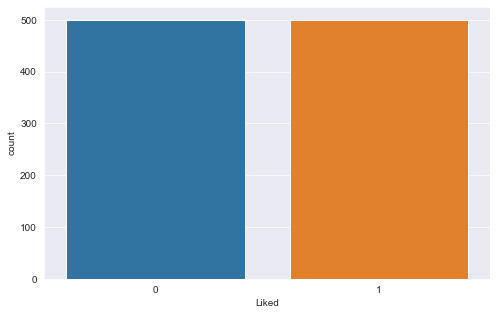

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(x=df.Liked);

In [14]:
x=df['Review'].values
y=df['Liked'].values

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [16]:
x_train.shape

(750,)

In [17]:
x_test.shape

(250,)

In [18]:
y_train.shape

(750,)

In [19]:
y_test.shape

(250,)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(stop_words='english')

In [21]:
x_train_vect=vect.fit_transform(x_train)
x_test_vect=vect.transform(x_test)

In [22]:
from sklearn.svm import SVC
model=SVC()

In [23]:
model.fit(x_train_vect,y_train)

SVC()

In [24]:
y_pred=model.predict(x_test_vect)

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(y_pred,y_test)

0.72

In [28]:
#USING PIPELINE

In [33]:
from sklearn.pipeline import make_pipeline
text_model=make_pipeline(CountVectorizer(),SVC())

In [34]:
text_model.fit(x_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()), ('svc', SVC())])

In [35]:
y_pred=text_model.predict(x_test)

In [36]:
y_pred

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0])

In [37]:
accuracy_score(y_pred,y_test)

0.792

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

data = pd.read_csv('Restaurant_Reviews.csv')
x = data['Review']
y = data['Liked']
x, x_test, y, y_test = train_test_split(x, y, stratify=y, test_size=0.25, random_state=42)
vec = CountVectorizer(stop_words='english')
x = vec.fit_transform(x).toarray()
x_test = vec.transform(x_test).toarray()
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x, y)
model.score(x_test, y_test)
model.predict(vec.transform(['Love this app simply awesome!']))

array([1])

In [56]:
import joblib

joblib.dump(text_model, 'VerzeoMajorProject')
import joblib

text_model = joblib.load('VerzeoMajorProject')

In [62]:
text_model.predict(['hello!!Love Your Food'])

array([1])